In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
% matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from textblob import TextBlob
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel
#import pandas.plotting.scatter_matrix 
#import 'pandas.plotting.scatter_matrix'

import random
random.seed (1)

train = pd.read_csv('Train_Data.csv')
test = pd.read_csv('Test_Data.csv')

X = train.tweet
y = train.label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

C:\Users\9020\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\9020\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
pd.set_option('display.max_colwidth', 1000)

In [3]:
train.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
5,6,1,iPhone software update fucked up my phone big time Stupid iPhones
6,7,0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/
7,8,0,New Type C charger cable #UK http://www.ebay.co.uk/itm/-/112598674021 … #bay #Amazon #etsy New Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE 2018 #NewYear #Starting 2018 #recipes #technology #SamsungGalaxyS9 #iPhoneX pic.twitter.com/PjIwq59WtC
8,9,0,Bout to go shopping again listening to music #iphone #justme #music #likeforlike #followforfollow… http://instagr.am/p/Vj6bg5tLql/
9,10,0,Photo: #fun #selfie #pool #water #sony #camera #picoftheday #sun #instagood #boy #cute #outdoor... http://tmblr.co/ZAjC0n1ms_Gp8


In [4]:
train.tail(10)

,id,label,tweet
7910,7911,0,Perfect match #instagood #applewatch #red #instagram #iphone #picoftheday #gay #fashion… https://www.instagram.com/p/BPBDUMEAQgb/
7911,7912,0,I am completely in love with the new iPhone emojis!! #iPhone #apple #emojs
7912,7913,0,Tune in. Turn on. Drop out. & #GTD in one app! http://bit.ly/cebF6 #mobile #mind #meditate #opensit #iphone
7913,7914,1,Ok so my galaxy crashed after one day now I have to wait til Monday for my skyrocket but using iPhone for now...
7914,7915,0,Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow 1ö[q
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/5spiNsJ_c9/
7916,7917,0,"We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessories #news #life February 23, 2017 at 0…"
7917,7918,0,Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!
7918,7919,0,"Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/"
7919,7920,0,Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/


In [5]:
def eng(X):
    X['is_there_http'] = X['tweet'].apply(lambda text: 'http' in text)
    d = {True: 1, False:0}
    X['is_there_http'] = X['is_there_http'].map(d)
    X['word_count'] = X['tweet'].apply(lambda text: len(text.split()))
    X['hash_count'] = X['tweet'].apply(lambda text: len(text.split('#'))-1)
    X['word_hash_plus'] = X.word_count + X.hash_count
    X['word_hash_minus'] = X.word_count - X.hash_count
    X['blob_pola'] = X['tweet'].apply(lambda text: TextBlob(text).sentiment.polarity)
    X['blob_subj'] = X['tweet'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

In [6]:
train.head(1)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone


In [7]:
test.head(1)

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks


In [8]:
eng(train)
eng(test)

In [9]:
train.head(1)

,id,label,tweet,is_there_http,word_count,hash_count,word_hash_plus,word_hash_minus,blob_pola,blob_subj
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,1,13,11,24,2,0.675,1.0


In [10]:
test.head(1)

,id,tweet,is_there_http,word_count,hash_count,word_hash_plus,word_hash_minus,blob_pola,blob_subj
0,7921,I hate the new #iphone upgrade. Won't let me download apps. #ugh #apple sucks,0,14,3,17,11,-0.321212,0.551515


In [11]:
train_co = train.drop(['id', 'tweet'], axis = 1)

In [12]:
test_co = test.drop(['id', 'tweet'], axis = 1)

In [13]:
train_co.head(2)

,label,is_there_http,word_count,hash_count,word_hash_plus,word_hash_minus,blob_pola,blob_subj
0,0,1,13,11,24,2,0.675000,1.000000
1,0,1,17,5,22,12,0.233333,0.733333


In [14]:
train_co.corr()

,label,is_there_http,word_count,hash_count,word_hash_plus,word_hash_minus,blob_pola,blob_subj
label,1.000000,-0.529995,0.116934,-0.480908,-0.208223,0.484315,-0.374205,-0.013485
is_there_http,-0.529995,1.000000,-0.266855,0.406480,0.066129,-0.556697,0.243344,0.010906
word_count,0.116934,-0.266855,1.000000,0.286714,0.823633,0.649299,-0.013357,0.045994
hash_count,-0.480908,0.406480,0.286714,1.000000,0.779461,-0.542440,0.244727,0.046146
word_hash_plus,-0.208223,0.066129,0.823633,0.779461,1.000000,0.103468,0.136138,0.057393
word_hash_minus,0.484315,-0.556697,0.649299,-0.542440,0.103468,1.000000,-0.205992,0.003699
blob_pola,-0.374205,0.243344,-0.013357,0.244727,0.136138,-0.205992,1.000000,0.298567
blob_subj,-0.013485,0.010906,0.045994,0.046146,0.057393,0.003699,0.298567,1.000000


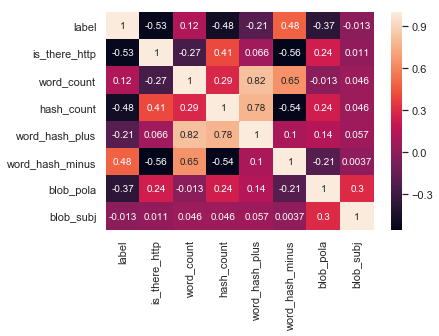

In [15]:
sns.heatmap(train_co.corr(), annot = True)

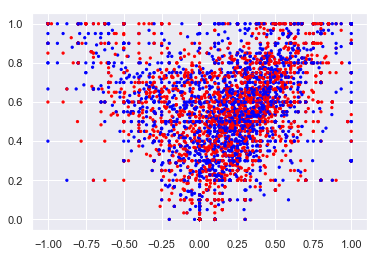

In [16]:
plt.scatter(train['blob_pola'], train['blob_subj'], c = ['red','blue'], s = 5)

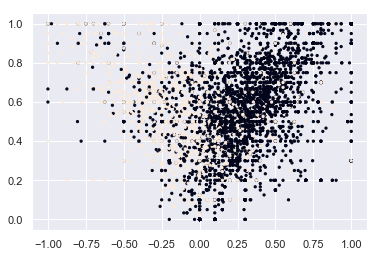

In [18]:
plt.scatter(train['blob_pola'], train['blob_subj'], c = train['label'], s = 5)

C:\Users\9020\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\9020\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\9020\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\9020\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


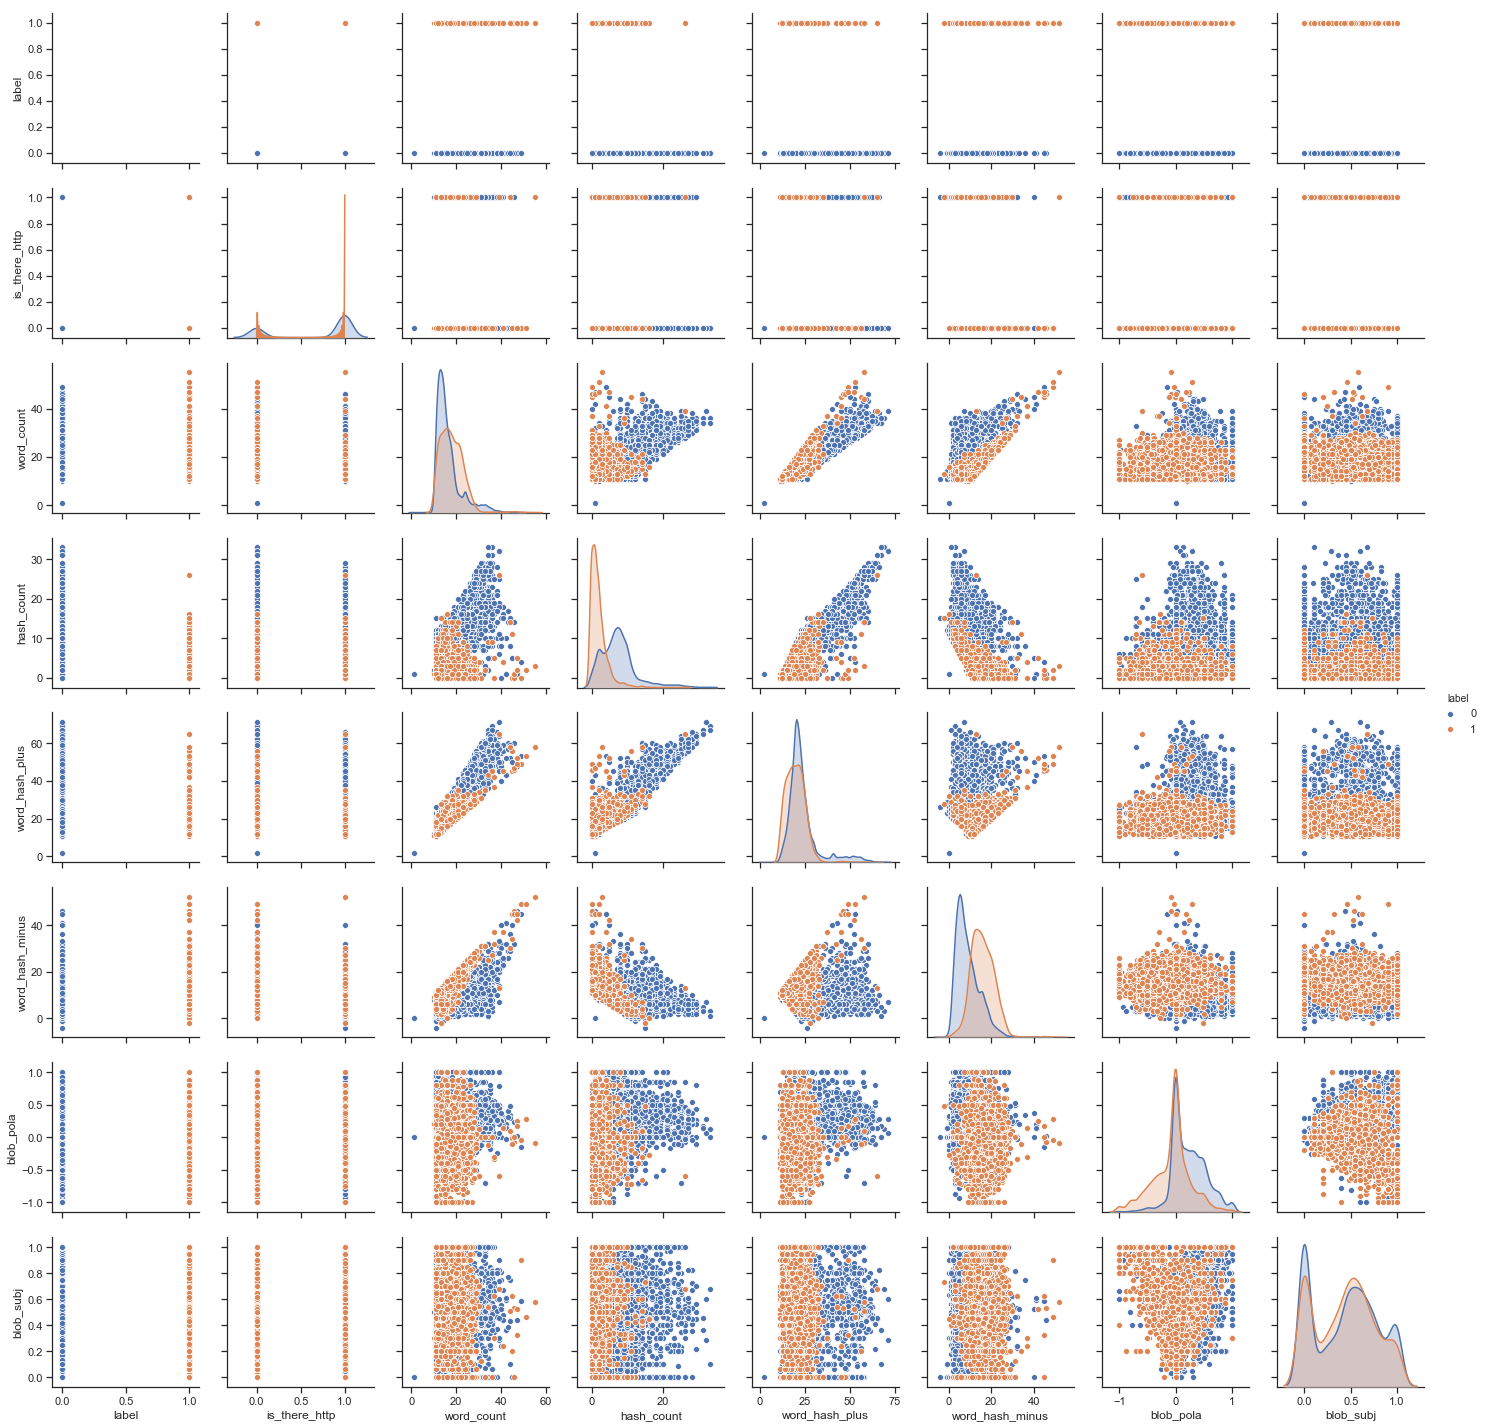

In [19]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
train_co
sns.pairplot(train_co, hue = 'label')

In [20]:
X = train_co.drop('label', axis = 1)
y = train_co.label
print (X.shape)
print (y.shape)

(7920, 7)
(7920,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print (X_train.shape)
print (X_test.shape)

(5940, 7)
(1980, 7)


In [22]:
clf = RandomForestClassifier(n_estimators=500, random_state = 1)
model = clf.fit(X_train, y_train)
model.feature_importances_

array([0.13202339, 0.06169279, 0.21931459, 0.08214176, 0.15025567,
       0.21551822, 0.13905358])

In [23]:
X.columns

Index(['is_there_http', 'word_count', 'hash_count', 'word_hash_plus',
       'word_hash_minus', 'blob_pola', 'blob_subj'],
      dtype='object')

In [24]:
im = pd.DataFrame({'Features':X.columns, 'Importance Score':model.feature_importances_ })
im.sort_values(by = 'Importance Score', ascending = False, inplace = True)
im

,Features,Importance Score
2,hash_count,0.219315
5,blob_pola,0.215518
4,word_hash_minus,0.150256
6,blob_subj,0.139054
0,is_there_http,0.132023
3,word_hash_plus,0.082142
1,word_count,0.061693


In [25]:
one_feat = ['hash_count']
two_feat = ['hash_count','blob_pola']
three_feat = ['hash_count','blob_pola','word_hash_minus']
four_feat = ['hash_count','blob_pola','word_hash_minus','blob_subj']
five_feat = ['hash_count','blob_pola','word_hash_minus','blob_subj','is_there_http']
six_feat = ['hash_count','blob_pola','word_hash_minus','blob_subj','is_there_http', 'word_hash_plus']
seven_feat = ['hash_count','blob_pola','word_hash_minus','blob_subj','is_there_http', 'word_hash_plus','word_count']

In [26]:
def importance_test(feat):
    print ("Features used: ")
    print (feat)
    print ()
    X_train_sub = X_train[feat]
    X_test_sub = X_test[feat]
    clf = RandomForestClassifier(n_estimators=500, random_state = 1)
    print ("Model: ")
    print (clf)
    print ()
    model = clf.fit(X_train_sub, y_train)    
    y_pred_prob = model.predict_proba(X_test_sub)[:, 1]
    y_pred_class = model.predict(X_test_sub)
    print ('AUC: ', metrics.roc_auc_score(y_test, y_pred_prob))
    print ()
    print ('Matrix: \n', metrics.confusion_matrix (y_test, y_pred_class))
    print ()
    print ('Report: \n', metrics.classification_report (y_test, y_pred_class))
    print ()
    print ('f1-score: \n', metrics.f1_score(y_test, y_pred_class, average = 'weighted'))
    
    print('=====================================================================')
    return None

In [27]:
importance_test(one_feat)
importance_test(two_feat)
importance_test(three_feat)
importance_test(four_feat)
importance_test(five_feat)
importance_test(six_feat)
importance_test(seven_feat)

Features used: 
['hash_count']

Model: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

AUC:  0.8753119376743371

Matrix: 
 [[1334  108]
 [ 239  299]]

Report: 
              precision    recall  f1-score   support

          0       0.85      0.93      0.88      1442
          1       0.73      0.56      0.63       538

avg / total       0.82      0.82      0.82      1980


f1-score: 
 0.8164076522948829
Features used: 
['hash_count', 'blob_pola']

Model: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decreas

In [28]:
X_train_sub = train_co[five_feat]
y_train = train_co['label']

In [29]:
X_train_sub.head(1)

,hash_count,blob_pola,word_hash_minus,blob_subj,is_there_http
0,11,0.675,2,1.0,1


In [31]:
y_train.head(1)

0    0
Name: label, dtype: int64

In [38]:
param_grid = [{'kernel':['rbf', 'linear'], 'C':[0.5, 1, 10, 100]}]
grid_search = GridSearchCV(SVC(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('SVC best parameter: ', grid_search.best_params_)

SVC best parameter:  {'C': 10, 'kernel': 'rbf'}


In [39]:
param_grid = [{'kernel':['rbf', 'linear'], 'nu':[0.1, 0.5]}]
grid_search = GridSearchCV(NuSVC(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('NuSVC best parameter: ', grid_search.best_params_)

NuSVC best parameter:  {'kernel': 'rbf', 'nu': 0.5}


In [40]:
ite = [i for i in range(5, 200, 5)]
param_grid = [{'n_neighbors': ite}]
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('KNN best parameter: ', grid_search.best_params_)

KNN best parameter:  {'n_neighbors': 35}


In [41]:
param_grid = [{'alpha':[0.5, 1, 10]}]
grid_search = GridSearchCV(BernoulliNB(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('BernoulliNB best parameter: ', grid_search.best_params_)

BernoulliNB best parameter:  {'alpha': 0.5}


In [42]:
param_grid = [{'n_estimators':[50, 100, 200], 'algorithm':['SAMME', 'SAMME.R']}]
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('AdaBoostClassifier best parameter: ', grid_search.best_params_)

AdaBoostClassifier best parameter:  {'algorithm': 'SAMME.R', 'n_estimators': 100}


In [57]:
param_grid = [{'n_estimators':[50, 100, 200]}]
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('GradientBoostingClassifier best parameter: ', grid_search.best_params_)

GradientBoostingClassifier best parameter:  {'n_estimators': 100}


In [44]:
param_grid = [{'solver':['svd', 'eigen']}]
grid_search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv = 3, scoring='f1')
grid_search.fit(X_train_sub, y_train)
print ('LinearDiscriminantAnalysis best parameter: ', grid_search.best_params_)

LinearDiscriminantAnalysis best parameter:  {'solver': 'svd'}


In [45]:
X_train_sub = train_co[five_feat]
y_train = train_co['label']
X_test_sub = test_co[five_feat]

In [46]:
X_train.head(1)

,is_there_http,word_count,hash_count,word_hash_plus,word_hash_minus,blob_pola,blob_subj
5994,1,16,5,21,11,0.625,0.6


In [47]:
y_train.head(1)

0    0
Name: label, dtype: int64

In [48]:
X_test.head(1)

,is_there_http,word_count,hash_count,word_hash_plus,word_hash_minus,blob_pola,blob_subj
7178,1,13,8,21,5,0.8125,0.8


In [50]:
def model_feature_test(model):
    '''
   
    ''' 
    # X_traindata_dtm = vec.fit_transform(train.tweet)
    model.fit(X_train_sub, y_train)
    # X_testdata_dtm = vec.transform(test.tweet)
    y_result = model.predict(X_test_sub)
    
    D = pd.DataFrame({'id':[i for i in range(7921, 9874)], 'label':y_result})
    D.to_csv('Result.csv', index=False)

In [51]:
# F1-score = 0.855846266697066
model_feature_test(RandomForestClassifier(n_estimators=500))

In [53]:
# F1-score = 0.848473110747116
model_feature_test(SVC(C=10, kernel='rbf'))

In [54]:
# F1-score = 0.806082537927547
model_feature_test(NuSVC(kernel='rbf', nu=0.5))

In [55]:
# F1-score = 0.8406801896183
model_feature_test(KNeighborsClassifier(n_neighbors=35))

In [56]:
# F1-score = 0.815647707696752
model_feature_test(BernoulliNB(alpha = 0.5))

In [58]:
# F1-score = 0.851192436163037
model_feature_test(AdaBoostClassifier(algorithm='SAMME.R', n_estimators=100))

In [59]:
# F1-score = 0.851594593995369
model_feature_test(GradientBoostingClassifier(n_estimators=100))

In [60]:
# F1-score = 0.828973017338668
model_feature_test(LinearDiscriminantAnalysis(solver='svd'))

## Future Studies
* Try using stemming and lemmatization on the data
* Use Scapy and other NLP libraries